In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


In [2]:
#Load Dataset
data = pd.read_csv("weatherHistory.csv") 
print("----- Dataset Preview -----")
print(data.head(), "\n")
print(data.info(), "\n")
print("Missing Values:\n", data.isnull().sum(), "\n")


----- Dataset Preview -----
                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263        

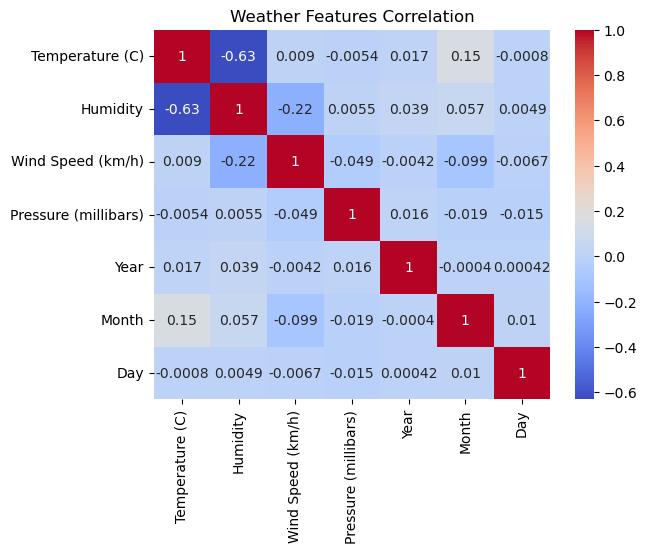

In [3]:
#Data Cleaning & EDA
data = data[['Formatted Date', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

data['Year'] = data['Formatted Date'].dt.year
data['Month'] = data['Formatted Date'].dt.month
data['Day'] = data['Formatted Date'].dt.day

sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Weather Features Correlation")
plt.show()


In [4]:
#Feature Selection
X = data[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Month', 'Day']]
y = data['Temperature (C)']


In [6]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0], "\n")


Training Samples: 77162
Testing Samples: 19291 



In [9]:
#Model Training
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

R2 Score: 0.44347115368960655
Mean Absolute Error: 5.791494429357224


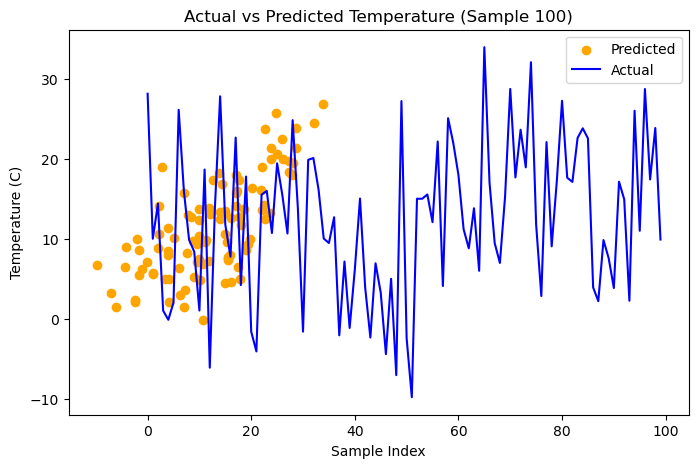

In [10]:
#Model Evaluation
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# Plot Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test.values[:100], y_pred[:100], color='orange', label='Predicted')
plt.plot(y_test.values[:100], color='blue', label='Actual')
plt.title("Actual vs Predicted Temperature (Sample 100)")
plt.xlabel("Sample Index")
plt.ylabel("Temperature (C)")
plt.legend()
plt.show()


In [11]:
#Predict New Weather Temperature
# Example input: [Humidity, Wind Speed, Pressure, Month, Day]
new_weather_data = [[0.75, 10, 1012, 8, 15]]
prediction = model.predict(new_weather_data)
print("Predicted Temperature (C):", round(prediction[0], 2))


Predicted Temperature (C): 12.3


E:\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
